In [ ]:
!pip install dmba

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 37.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import dmba
from sklearn.model_selection import train_test_split,KFold
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
from dmba import plotDecisionTree, classificationSummary

Colab environment detected.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
nba_df=pd.read_excel("NBA_2024_Shots.xlsx")
nba_df.head(5)

,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,...,BASIC_ZONE,ZONE_NAME,ZONE_ABB,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT
0,2024,2023-24,1610612764,Washington Wizards,1629673,Jordan Poole,G,SG,2023-11-03,22300003,...,In The Paint (Non-RA),Center,C,8-16 ft.,-0.4,17.45,12,1,11,1
1,2024,2023-24,1610612764,Washington Wizards,1630166,Deni Avdija,F,SF,2023-11-03,22300003,...,Above the Break 3,Center,C,24+ ft.,1.5,30.55,25,1,10,26
2,2024,2023-24,1610612764,Washington Wizards,1626145,Tyus Jones,G,PG,2023-11-03,22300003,...,Restricted Area,Center,C,Less Than 8 ft.,-3.3,6.55,3,1,9,46
3,2024,2023-24,1610612764,Washington Wizards,1629673,Jordan Poole,G,SG,2023-11-03,22300003,...,Restricted Area,Center,C,Less Than 8 ft.,-1.0,5.85,1,1,8,30
4,2024,2023-24,1610612764,Washington Wizards,1626145,Tyus Jones,G,PG,2023-11-03,22300003,...,Restricted Area,Center,C,Less Than 8 ft.,0.0,6.25,1,1,8,8


In [ ]:
#nba_df.info()
nba_df["SHOT_TYPE"].unique()
nba_df["ACTION_TYPE"].unique()



array(['Driving Floating Jump Shot', 'Jump Shot', 'Driving Layup Shot',
       'Running Finger Roll Layup Shot', 'Cutting Layup Shot',
       'Step Back Jump shot', 'Fadeaway Jump Shot',
       'Turnaround Fadeaway shot', 'Tip Layup Shot', 'Cutting Dunk Shot',
       'Driving Finger Roll Layup Shot', 'Floating Jump shot',
       'Cutting Finger Roll Layup Shot', 'Layup Shot', 'Pullup Jump shot',
       'Driving Floating Bank Jump Shot', 'Driving Reverse Layup Shot',
       'Running Layup Shot', 'Running Reverse Layup Shot',
       'Turnaround Jump Shot', 'Running Alley Oop Dunk Shot',
       'Driving Dunk Shot', 'Alley Oop Dunk Shot', 'Putback Dunk Shot',
       'Running Dunk Shot', 'Reverse Layup Shot', 'Jump Bank Shot',
       'Putback Layup Shot', 'Hook Shot', 'Running Jump Shot',
       'Dunk Shot', 'Turnaround Hook Shot', 'Running Pull-Up Jump Shot',
       'Driving Hook Shot', 'Tip Dunk Shot', 'Alley Oop Layup shot',
       'Finger Roll Layup Shot', 'Turnaround Bank shot',
      

In [ ]:
#Total number of records
Total_number_of_records=len(nba_df)
print("Total number of records:",Total_number_of_records)

print(0.05*Total_number_of_records)

#Checking for missing values
is_missing=nba_df.isnull().sum()
print(is_missing)

#The missing value count is less than 5 percent. As such, we decide to drop the rows with missing values for POSITION_GROUP and POSITION.
#LinearRegression is sklearn cannot handle missing values.

nba_df=nba_df.dropna(subset=['POSITION_GROUP','POSITION'])
New_number_of_records=len(nba_df)
print("New number of records:",New_number_of_records)



Total number of records: 218701
10935.050000000001
SEASON_1             0
SEASON_2             0
TEAM_ID              0
TEAM_NAME            0
PLAYER_ID            0
PLAYER_NAME          0
POSITION_GROUP    1264
POSITION          1264
GAME_DATE            0
GAME_ID              0
HOME_TEAM            0
AWAY_TEAM            0
EVENT_TYPE           0
SHOT_MADE            0
ACTION_TYPE          0
SHOT_TYPE            0
BASIC_ZONE           0
ZONE_NAME            0
ZONE_ABB             0
ZONE_RANGE           0
LOC_X                0
LOC_Y                0
SHOT_DISTANCE        0
QUARTER              0
MINS_LEFT            0
SECS_LEFT            0
dtype: int64
New number of records: 217437


In [ ]:
#Convert the categorical variables to dummy variables
POSITION_GROUP_DUMMY=pd.get_dummies(nba_df['POSITION_GROUP'],drop_first=True).astype(int)
POSITION_DUMMY=pd.get_dummies(nba_df['POSITION'],drop_first=True).astype(int)
HOME_TEAM_DUMMY=pd.get_dummies(nba_df['HOME_TEAM'],drop_first=True).astype(int)
AWAY_TEAM_DUMMY=pd.get_dummies(nba_df['AWAY_TEAM'],drop_first=True).astype(int)
EVENT_TYPE_DUMMY=pd.get_dummies(nba_df['EVENT_TYPE'],drop_first=True).astype(int)
ACTION_TYPE_DUMMY=pd.get_dummies(nba_df['ACTION_TYPE'],drop_first=True).astype(int)
SHOT_TYPE_DUMMY=pd.get_dummies(nba_df['SHOT_TYPE'],drop_first=True).astype(int)
BASIC_ZONE_DUMMY=pd.get_dummies(nba_df['BASIC_ZONE'],drop_first=True).astype(int)
ZONE_NAME_DUMMY=pd.get_dummies(nba_df['ZONE_NAME'],drop_first=True).astype(int)
ZONE_ABB_DUMMY=pd.get_dummies(nba_df['ZONE_ABB'],drop_first=True).astype(int)
ZONE_RANGE_DUMMY=pd.get_dummies(nba_df['ZONE_RANGE'],drop_first=True).astype(int)

print(len(POSITION_GROUP_DUMMY.columns))
print(len(POSITION_DUMMY.columns)) #Has 11 columns
print(len(HOME_TEAM_DUMMY.columns)) #Has 29 columns
print(len(AWAY_TEAM_DUMMY.columns)) #Has 29 columns
print(len(EVENT_TYPE_DUMMY.columns))
print(len(ACTION_TYPE_DUMMY.columns)) #Has 47 columns
print(len(SHOT_TYPE_DUMMY.columns))
print(len(BASIC_ZONE_DUMMY.columns))
print(len(ZONE_NAME_DUMMY.columns))
print(len(ZONE_ABB_DUMMY.columns))
print(len(ZONE_RANGE_DUMMY.columns))

#Based on the independent variables and outcome variables, we see that the cardinability increases drastically after one hot encoding due to multiple categories.
#As such, we decide to conduct target encoding for the categorical variables.

print(nba_df["SHOT_MADE"].dtype)

#Convert the boolean data type to integer type
nba_df["SHOT_MADE"]=nba_df["SHOT_MADE"].astype(int)
nba_df["SHOT_MADE"].head(5)

2
11
29
29
1
47
1
6
5
5
4
bool


,SHOT_MADE
0,0
1,1
2,1
3,1
4,1


<Axes: >

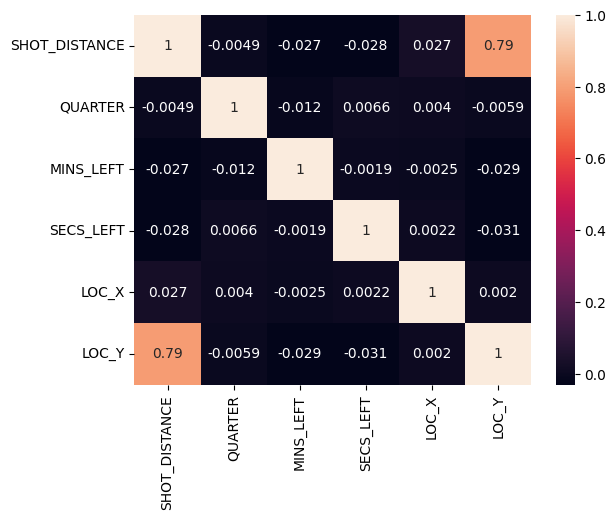

In [ ]:
#Checking correlation of the numerical variables
X1_numericals = ['SHOT_DISTANCE', 'QUARTER', 'MINS_LEFT', 'SECS_LEFT', 'LOC_X', 'LOC_Y']
sns.heatmap(nba_df[X1_numericals].corr(),annot=True)

#Multicollinearity does not appear to be a major issue.
#SHOT_DISTANCE_and LOC_Y has the highets correlation of 0.79


In [ ]:
X1=nba_df.drop(['SHOT_MADE','SEASON_1','SEASON_2',"GAME_DATE","GAME_ID", "TEAM_NAME","TEAM_ID","PLAYER_ID","PLAYER_NAME"],axis=1)
y1=nba_df["SHOT_MADE"]
print(y1.name)


SHOT_MADE


In [ ]:
X1_train, X1_test, y1_train,y1_test=train_test_split(X1,y1, test_size=0.3, random_state=42)
categorical_columns = ['POSITION_GROUP', 'POSITION', 'HOME_TEAM', 'AWAY_TEAM', 'EVENT_TYPE', 'ACTION_TYPE', 'SHOT_TYPE', 'BASIC_ZONE', 'ZONE_NAME', 'ZONE_ABB', 'ZONE_RANGE']

def target_encode(train_data, train_target, test_data, categorical_columns):
    """
    Perform target encoding for categorical columns.

    Parameters:
    train_data (pd.DataFrame): Training predictor data.
    train_target (pd.Series): Training target data.
    test_data (pd.DataFrame): Test predictor data.
    categorical_columns (list): List of categorical columns to target encode.

    Returns:
    pd.DataFrame, pd.DataFrame: Encoded training and test datasets.
    """
    train_encoded = train_data.copy()
    test_encoded = test_data.copy()

    for col in categorical_columns:
        # Compute the mean target for each category in the column
        target_means = train_target.groupby(train_data[col]).mean()

        # Replace categories with their target mean
        train_encoded[col] = train_data[col].map(target_means)
        test_encoded[col] = test_data[col].map(target_means)

        # Fill missing values in test set (categories not seen in train set)
        test_encoded[col].fillna(train_target.mean(), inplace=True)

    return train_encoded, test_encoded

# Example split of data (already done in your case)
# X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)


# Apply target encoding to train and test sets
X1_train_encoded, X1_test_encoded = target_encode(X1_train, y1_train, X1_test, categorical_columns)




<ipython-input-48-2e0855dc9148>:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_encoded[col].fillna(train_target.mean(), inplace=True)
<ipython-input-48-2e0855dc9148>:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [ ]:
#Logistic Regression model
model_1_lr=LogisticRegression()
model_1_lr.fit(X1_train_encoded,y1_train)
accuracy_model_1_lr=accuracy_score(y1_test,model_1_lr.predict(X1_test_encoded))
print("Accuracy:",accuracy_model_1_lr)
print(classification_report(y1_test,model_1_lr.predict(X1_test_encoded)))

#The accuracy of the model is 1. It could be a case of overfitting.

#We check the slopes to identify the most influential factors in predicting the probability of shot made
intercept_1_lr=model_1_lr.intercept_
slope_1_lr=model_1_lr.coef_
print(intercept_1_lr)
print(slope_1_lr)

#We check the slope based on the column names for readability
coefficients_1 = model_1_lr.coef_[0]
feature_names_1 = X1_train_encoded.columns
# Create a DataFrame for slopes (coefficients) and feature names
slopes_1 = pd.DataFrame({'Feature': feature_names_1, 'Slope': coefficients_1})
slopes_1["Magnitude"]=slopes_1["Slope"].abs()
Most_influential_variables=slopes_1.sort_values(by="Magnitude",ascending=False)
print(Most_influential_variables)
#Based on the slope magnitude, EVENT_TYPE is the most influential variable in predicting SHOT_MADE, followed by
#SHOT_TYPE,ZONE_RANGE, ZONE_ABB, ZONE_NAME, ZONE_RANGE, and AWAY_TEAM.
#EVENT_TYPE is the only parameter than increases the probability of making a shot by 16.74.




Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34237
           1       1.00      1.00      1.00     30995

    accuracy                           1.00     65232
   macro avg       1.00      1.00      1.00     65232
weighted avg       1.00      1.00      1.00     65232

[-2.02606053]
[[-9.32545648e-01 -9.28833429e-01 -9.32355190e-01 -9.35429886e-01
   1.67200704e+01 -5.47787547e-01 -1.21616366e+00 -9.86238838e-01
  -1.05362837e+00 -1.05362837e+00 -1.20883772e+00  2.04294896e-06
  -4.79914606e-03 -7.26259907e-02 -1.35045548e-01 -3.58875393e-02
  -4.31586158e-03]]
           Feature      Slope  Magnitude
4       EVENT_TYPE  16.720070  16.720070
6        SHOT_TYPE  -1.216164   1.216164
10      ZONE_RANGE  -1.208838   1.208838
9         ZONE_ABB  -1.053628   1.053628
8        ZONE_NAME  -1.053628   1.053628
7       BASIC_ZONE  -0.986239   0.986239
3        AWAY_TEAM  -0.935430   0.935430
0   POSITION_GROUP  -0.932546   0

In [ ]:
#We remove EVENT_TYPE since it is a very obvious predictor.
X1_new=X1.drop(["EVENT_TYPE"],axis=1)
y1_new=y1
X1_train1,X1_test1,y1_train1,y1_test1=train_test_split(X1_new,y1_new, test_size=0.3, random_state=42)


categorical_columns_1 = ['POSITION_GROUP', 'POSITION', 'HOME_TEAM', 'AWAY_TEAM', 'ACTION_TYPE', 'SHOT_TYPE', 'BASIC_ZONE', 'ZONE_NAME', 'ZONE_ABB', 'ZONE_RANGE']

def target_encode1(train_data, train_target, test_data, categorical_columns):
    """
    Perform target encoding for categorical columns.

    Parameters:
    train_data (pd.DataFrame): Training predictor data.
    train_target (pd.Series): Training target data.
    test_data (pd.DataFrame): Test predictor data.
    categorical_columns (list): List of categorical columns to target encode.

    Returns:
    pd.DataFrame, pd.DataFrame: Encoded training and test datasets.
    """
    train_encoded = train_data.copy()
    test_encoded = test_data.copy()

    for col in categorical_columns_1:
        # Compute the mean target for each category in the column
        target_means = train_target.groupby(train_data[col]).mean()

        # Replace categories with their target mean
        train_encoded[col] = train_data[col].map(target_means)
        test_encoded[col] = test_data[col].map(target_means)

        # Fill missing values in test set (categories not seen in train set)
        test_encoded[col].fillna(train_target.mean(), inplace=True)

    return train_encoded, test_encoded

# Example split of data (already done in your case)
# X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)


# Apply target encoding to train and test sets
X1_train_encoded1, X1_test_encoded1 = target_encode(X1_train1, y1_train1, X1_test1, categorical_columns_1)


<ipython-input-48-2e0855dc9148>:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_encoded[col].fillna(train_target.mean(), inplace=True)
<ipython-input-48-2e0855dc9148>:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [ ]:
model_1_lr_1=LogisticRegression()
model_1_lr_1.fit(X1_train_encoded1,y1_train1)
accuracy_model_1_lr_1=accuracy_score(y1_test1,model_1_lr_1.predict(X1_test_encoded1))
print("Accuracy:",accuracy_model_1_lr_1)
classification_report_model_1_lr_1=classification_report(y1_test1,model_1_lr_1.predict(X1_test_encoded1))
print(classification_report_model_1_lr_1)
#Accuracy is 62 percent.

intercept_2_lr=model_1_lr.intercept_
print(intercept_1_lr)


#We check the slope based on the column names for readability
coefficients_2 = model_1_lr_1.coef_[0]
feature_names_2 = X1_train_encoded1.columns
# Create a DataFrame for slopes (coefficients) and feature names
slopes_2 = pd.DataFrame({'Feature': feature_names_2, 'Slope': coefficients_2})
slopes_2["Magnitude"]=slopes_2["Slope"].abs()
Most_influential_variables_2=slopes_2.sort_values(by="Magnitude",ascending=False)
print(Most_influential_variables_2)

#Based on the results, ACTION_TYPE is the most influential predictor followed by ZONE_RANGE, BASIC_ZONE, SHOT_TYPE, POSITION, POSITION_GROUP and so on.
#Since we target encoded the data, we cannot say which values in the categorial variables are the most influential.
#We conduct one hot encoding using dummy variables for an indepth analysis.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.6180555555555556
              precision    recall  f1-score   support

           0       0.61      0.77      0.68     34237
           1       0.64      0.44      0.53     30995

    accuracy                           0.62     65232
   macro avg       0.62      0.61      0.60     65232
weighted avg       0.62      0.62      0.61     65232

[-2.02606053]
           Feature     Slope  Magnitude
4      ACTION_TYPE  3.652550   3.652550
9       ZONE_RANGE -3.100150   3.100150
6       BASIC_ZONE  2.048479   2.048479
5        SHOT_TYPE -0.599078   0.599078
1         POSITION  0.410027   0.410027
0   POSITION_GROUP  0.149370   0.149370
7        ZONE_NAME  0.077981   0.077981
8         ZONE_ABB  0.077981   0.077981
2        HOME_TEAM  0.058859   0.058859
3        AWAY_TEAM -0.051575   0.051575
12   SHOT_DISTANCE -0.024751   0.024751
13         QUARTER -0.016415   0.016415
14       MINS_LEFT  0.012464   0.012464
15       SECS_LEFT  0.001205   0.001205
11           LOC_Y -0.000428  

In [ ]:
nba_df=pd.read_excel("NBA_2024_Shots.xlsx")
nba_df.head(5)


,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,...,BASIC_ZONE,ZONE_NAME,ZONE_ABB,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT
0,2024,2023-24,1610612764,Washington Wizards,1629673,Jordan Poole,G,SG,2023-11-03,22300003,...,In The Paint (Non-RA),Center,C,8-16 ft.,-0.4,17.45,12,1,11,1
1,2024,2023-24,1610612764,Washington Wizards,1630166,Deni Avdija,F,SF,2023-11-03,22300003,...,Above the Break 3,Center,C,24+ ft.,1.5,30.55,25,1,10,26
2,2024,2023-24,1610612764,Washington Wizards,1626145,Tyus Jones,G,PG,2023-11-03,22300003,...,Restricted Area,Center,C,Less Than 8 ft.,-3.3,6.55,3,1,9,46
3,2024,2023-24,1610612764,Washington Wizards,1629673,Jordan Poole,G,SG,2023-11-03,22300003,...,Restricted Area,Center,C,Less Than 8 ft.,-1.0,5.85,1,1,8,30
4,2024,2023-24,1610612764,Washington Wizards,1626145,Tyus Jones,G,PG,2023-11-03,22300003,...,Restricted Area,Center,C,Less Than 8 ft.,0.0,6.25,1,1,8,8


In [ ]:
nba_df=nba_df.dropna(subset=['POSITION_GROUP','POSITION'])
New_number_of_records=len(nba_df)
print("New number of records:",New_number_of_records)


New number of records: 217437


In [ ]:
POSITION_GROUP_DUMMY=pd.get_dummies(nba_df['POSITION_GROUP'],drop_first=True).astype(int)
POSITION_DUMMY=pd.get_dummies(nba_df['POSITION'],drop_first=True).astype(int)
HOME_TEAM_DUMMY=pd.get_dummies(nba_df['HOME_TEAM'],drop_first=True).astype(int)
AWAY_TEAM_DUMMY=pd.get_dummies(nba_df['AWAY_TEAM'],drop_first=True).astype(int)
#EVENT_TYPE_DUMMY=pd.get_dummies(nba_df['EVENT_TYPE'],drop_first=True).astype(int)
ACTION_TYPE_DUMMY=pd.get_dummies(nba_df['ACTION_TYPE'],drop_first=True).astype(int)
SHOT_TYPE_DUMMY=pd.get_dummies(nba_df['SHOT_TYPE'],drop_first=True).astype(int)
BASIC_ZONE_DUMMY=pd.get_dummies(nba_df['BASIC_ZONE'],drop_first=True).astype(int)
ZONE_NAME_DUMMY=pd.get_dummies(nba_df['ZONE_NAME'],drop_first=True).astype(int)
ZONE_ABB_DUMMY=pd.get_dummies(nba_df['ZONE_ABB'],drop_first=True).astype(int)
ZONE_RANGE_DUMMY=pd.get_dummies(nba_df['ZONE_RANGE'],drop_first=True).astype(int)
nba_df["SHOT_MADE"]=nba_df["SHOT_MADE"].astype(int)
nba_df["SHOT_MADE"].head(5)


,SHOT_MADE
0,0
1,1
2,1
3,1
4,1


In [ ]:
#Creating dummy variables
nba_df=pd.concat([nba_df,POSITION_GROUP_DUMMY,POSITION_DUMMY,HOME_TEAM_DUMMY,AWAY_TEAM_DUMMY,ACTION_TYPE_DUMMY,SHOT_TYPE_DUMMY,BASIC_ZONE_DUMMY,ZONE_NAME_DUMMY,ZONE_ABB_DUMMY,ZONE_RANGE_DUMMY],axis=1)
nba_df.columns.tolist()
X2=nba_df.drop(['SHOT_MADE','SEASON_1','SEASON_2',"GAME_DATE","GAME_ID", "TEAM_NAME","TEAM_ID","PLAYER_ID","PLAYER_NAME","POSITION_GROUP","POSITION","HOME_TEAM","AWAY_TEAM","EVENT_TYPE","ACTION_TYPE","SHOT_TYPE","BASIC_ZONE","ZONE_NAME","ZONE_ABB","ZONE_RANGE"],axis=1)
y2=nba_df["SHOT_MADE"]


In [ ]:
X2_train, X2_test, y2_train,y2_test=train_test_split(X2,y2, test_size=0.3, random_state=42)
model_2_lr=LogisticRegression()
model_2_lr.fit(X2_train,y2_train)
accuracy_model_2_lr=accuracy_score(y2_test,model_2_lr.predict(X2_test))
print("Accuracy:",accuracy_model_2_lr)
print(classification_report(y2_test,model_2_lr.predict(X2_test)))

intercept_model_2_lr=model_2_lr.intercept_
slope_model_2_lr=model_2_lr.coef_
print(intercept_model_2_lr)

coefficients_3 = model_2_lr.coef_[0]
feature_names_3 = X2_train.columns
# Create a DataFrame for slopes (coefficients) and feature names
slopes_3 = pd.DataFrame({'Feature': feature_names_3, 'Slope': coefficients_3})
slopes_3["Magnitude"]=slopes_3["Slope"].abs()
Most_influential_variables_3=slopes_3.sort_values(by="Magnitude",ascending=False)
pd.set_option('display.max_rows', None)
print(Most_influential_variables_3)

#When decoding the values of the categorical variables, SHOT_TYPE of Tip Layup Shot, Running Dunk Shot, Cutting Dunk Shot, and Driving Dunk Shot are most influential in influencing the probability of making a shot.
#Zone area of Restricted Area increases the probability of making a shot.



Accuracy: 0.621290164336522
              precision    recall  f1-score   support

           0       0.61      0.77      0.68     34237
           1       0.64      0.45      0.53     30995

    accuracy                           0.62     65232
   macro avg       0.63      0.61      0.61     65232
weighted avg       0.63      0.62      0.61     65232

[0.42849137]
                                Feature     Slope  Magnitude
117                      Tip Layup Shot -1.050316   1.050316
107                   Running Dunk Shot  0.855043   0.855043
78                    Cutting Dunk Shot  0.819908   0.819908
87                   Driving Layup Shot -0.808849   0.808849
99                           Layup Shot -0.703270   0.703270
129                     Restricted Area  0.486920   0.486920
110                  Running Layup Shot -0.404747   0.404747
82                    Driving Dunk Shot  0.396149   0.396149
90                            Dunk Shot  0.389633   0.389633
89           Driving R

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
nba_df_1=pd.read_excel("NBA_2024_Shots.xlsx")
nba_df_1.head(5)

#We exclude EVEN_TYPE,AWAY_TEAM, and ACTION_TYPE for simplicity
nba_df_1=nba_df_1.dropna(subset=['POSITION_GROUP','POSITION'])
New_number_of_records=len(nba_df_1)
print("New number of records:",New_number_of_records)


New number of records: 217437


In [ ]:
#We exclude EVEN_TYPE,AWAY_TEAM, and ACTION_TYPE for simplicity
nba_df_1=nba_df_1.drop(["EVENT_TYPE","AWAY_TEAM","ACTION_TYPE"],axis=1)
nba_df_1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 217437 entries, 0 to 218700
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   SEASON_1        217437 non-null  int64         
 1   SEASON_2        217437 non-null  object        
 2   TEAM_ID         217437 non-null  int64         
 3   TEAM_NAME       217437 non-null  object        
 4   PLAYER_ID       217437 non-null  int64         
 5   PLAYER_NAME     217437 non-null  object        
 6   POSITION_GROUP  217437 non-null  object        
 7   POSITION        217437 non-null  object        
 8   GAME_DATE       217437 non-null  datetime64[ns]
 9   GAME_ID         217437 non-null  int64         
 10  HOME_TEAM       217437 non-null  object        
 11  SHOT_MADE       217437 non-null  bool          
 12  SHOT_TYPE       217437 non-null  object        
 13  BASIC_ZONE      217437 non-null  object        
 14  ZONE_NAME       217437 non-null  object  

In [ ]:
POSITION_GROUP_DUMMY_1=pd.get_dummies(nba_df_1['POSITION_GROUP'],drop_first=True).astype(int)
POSITION_DUMMY_1=pd.get_dummies(nba_df_1['POSITION'],drop_first=True).astype(int)
HOME_TEAM_DUMMY_1=pd.get_dummies(nba_df_1['HOME_TEAM'],drop_first=True).astype(int)
SHOT_TYPE_DUMMY_1=pd.get_dummies(nba_df_1['SHOT_TYPE'],drop_first=True).astype(int)
BASIC_ZONE_DUMMY_1=pd.get_dummies(nba_df_1['BASIC_ZONE'],drop_first=True).astype(int)
ZONE_NAME_DUMMY_1=pd.get_dummies(nba_df_1['ZONE_NAME'],drop_first=True).astype(int)
ZONE_ABB_DUMMY_1=pd.get_dummies(nba_df_1['ZONE_ABB'],drop_first=True).astype(int)
ZONE_RANGE_DUMMY_1=pd.get_dummies(nba_df_1['ZONE_RANGE'],drop_first=True).astype(int)
nba_df_1=pd.concat([nba_df_1,POSITION_GROUP_DUMMY_1,POSITION_DUMMY_1,HOME_TEAM_DUMMY_1,SHOT_TYPE_DUMMY_1,BASIC_ZONE_DUMMY_1,ZONE_NAME_DUMMY_1,ZONE_ABB_DUMMY_1,ZONE_RANGE_DUMMY_1],axis=1)
nba_df_1["SHOT_MADE"]=nba_df_1["SHOT_MADE"].astype(int)


X2_1=nba_df_1.drop(['SHOT_MADE','SEASON_1','SEASON_2',"GAME_DATE","GAME_ID", "TEAM_NAME","TEAM_ID","PLAYER_ID","PLAYER_NAME","POSITION_GROUP","POSITION","HOME_TEAM","SHOT_TYPE","BASIC_ZONE","ZONE_NAME","ZONE_ABB","ZONE_RANGE"],axis=1)
y2_1=nba_df_1["SHOT_MADE"]

In [ ]:
X2_train2, X2_test2, y2_train2,y2_test2=train_test_split(X2_1,y2_1, test_size=0.3, random_state=42)
model_2_lr_3=LogisticRegression()
model_2_lr_3.fit(X2_train2,y2_train2)
accuracy_model_2_lr_3=accuracy_score(y2_test2,model_2_lr_3.predict(X2_test2))
print("Accuracy:",accuracy_model_2_lr_3)
print(classification_report(y2_test2,model_2_lr_3.predict(X2_test2)))

#The accuracy improves after removing AWAY_TEAM and ACTION_TYPE.
#EVENT_TYPE appears to be a hidden dependent variable that incorrectly lead to accuracy 1.
#The accuracy is 62 percent. It stays the same even after removing the variables.

intercept_model_2_lr_3=model_2_lr_3.intercept_
slope_model_2_lr_3=model_2_lr_3.coef_
print(intercept_model_2_lr_3)

coefficients_4 = model_2_lr_3.coef_[0]
feature_names_4 = X2_train2.columns
# Create a DataFrame for slopes (coefficients) and feature names
slopes_4 = pd.DataFrame({'Feature': feature_names_4, 'Slope': coefficients_4})
slopes_4["Magnitude"]=slopes_4["Slope"].abs()
Most_influential_variables_4=slopes_4.sort_values(by="Magnitude",ascending=False)
pd.set_option('display.max_rows', None)
print(Most_influential_variables_4)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.6199871228844739
              precision    recall  f1-score   support

           0       0.60      0.80      0.69     34237
           1       0.66      0.42      0.51     30995

    accuracy                           0.62     65232
   macro avg       0.63      0.61      0.60     65232
weighted avg       0.63      0.62      0.60     65232

[0.26195477]
                  Feature     Slope  Magnitude
53        Restricted Area  0.480418   0.480418
50  In The Paint (Non-RA) -0.292362   0.292362
66               8-16 ft.  0.178947   0.178947
65                24+ ft.  0.151284   0.151284
68        Less Than 8 ft. -0.143312   0.143312
48         3PT Field Goal  0.117760   0.117760
51          Left Corner 3  0.094789   0.094789
27                    GSW  0.093302   0.093302
55                 Center  0.086822   0.086822
60                      C  0.086822   0.086822
37                    NYK -0.084463   0.084463
40                    PHI -0.080712   0.080712
29                  

In [ ]:
nba_df_2=pd.read_excel("NBA_2024_Shots.xlsx")
nba_df_2.head(5)


,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,...,BASIC_ZONE,ZONE_NAME,ZONE_ABB,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT
0,2024,2023-24,1610612764,Washington Wizards,1629673,Jordan Poole,G,SG,2023-11-03,22300003,...,In The Paint (Non-RA),Center,C,8-16 ft.,-0.4,17.45,12,1,11,1
1,2024,2023-24,1610612764,Washington Wizards,1630166,Deni Avdija,F,SF,2023-11-03,22300003,...,Above the Break 3,Center,C,24+ ft.,1.5,30.55,25,1,10,26
2,2024,2023-24,1610612764,Washington Wizards,1626145,Tyus Jones,G,PG,2023-11-03,22300003,...,Restricted Area,Center,C,Less Than 8 ft.,-3.3,6.55,3,1,9,46
3,2024,2023-24,1610612764,Washington Wizards,1629673,Jordan Poole,G,SG,2023-11-03,22300003,...,Restricted Area,Center,C,Less Than 8 ft.,-1.0,5.85,1,1,8,30
4,2024,2023-24,1610612764,Washington Wizards,1626145,Tyus Jones,G,PG,2023-11-03,22300003,...,Restricted Area,Center,C,Less Than 8 ft.,0.0,6.25,1,1,8,8


In [ ]:
nba_df_2=nba_df_2.dropna(subset=['POSITION_GROUP','POSITION'])
New_number_of_records=len(nba_df_2)
print("New number of records:",New_number_of_records)

New number of records: 217437


In [ ]:
nba_df_2["POSITION_GROUP"]=pd.factorize(nba_df_2["POSITION_GROUP"])[0]
nba_df_2["POSITION"]=pd.factorize(nba_df_2["POSITION"])[0]
nba_df_2["HOME_TEAM"]=pd.factorize(nba_df_2["HOME_TEAM"])[0]
nba_df_2["AWAY_TEAM"]=pd.factorize(nba_df_2["AWAY_TEAM"])[0]
nba_df_2["EVENT_TYPE"]=pd.factorize(nba_df_2["EVENT_TYPE"])[0]
nba_df_2["ACTION_TYPE"]=pd.factorize(nba_df_2["ACTION_TYPE"])[0]
nba_df_2["SHOT_TYPE"]=pd.factorize(nba_df_2["SHOT_TYPE"])[0]
nba_df_2["BASIC_ZONE"]=pd.factorize(nba_df_2["BASIC_ZONE"])[0]
nba_df_2["ZONE_NAME"]=pd.factorize(nba_df_2["ZONE_NAME"])[0]
nba_df_2["ZONE_ABB"]=pd.factorize(nba_df_2["ZONE_ABB"])[0]
nba_df_2["ZONE_RANGE"]=pd.factorize(nba_df_2["ZONE_RANGE"])[0]

X3=nba_df_2.drop(['SHOT_MADE','SEASON_1','SEASON_2',"GAME_DATE","GAME_ID", "TEAM_NAME","TEAM_ID","PLAYER_ID","PLAYER_NAME"],axis=1)

nba_df_2["SHOT_MADE"]=nba_df_2["SHOT_MADE"].astype(int)
y3=nba_df_2["SHOT_MADE"]

In [ ]:
X3_train, X3_test, y3_train,y3_test=train_test_split(X3,y3, test_size=0.3, random_state=42)
from sklearn.tree import DecisionTreeClassifier
model_1_decisiontree=DecisionTreeClassifier(max_depth=20,random_state=42)
model_1_decisiontree.fit(X3_train,y3_train)


DecisionTreeClassifier(max_depth=20, random_state=42)

In [ ]:
accuracy_model_1_decisiontree=accuracy_score(y3_test,model_1_decisiontree.predict(X3_test))
print("Accuracy:",accuracy_model_1_decisiontree)
classifification_report=classification_report(y3_test,model_1_decisiontree.predict(X3_test))
print(classifification_report)

#The accuracy of the decision tree model is 1. However, we feel there could be a problem of overfitting.
# model_2_decisiontree=DecisionTreeClassifier(max_depth=20,min_impurity_decrease=0.00, random_state=42)
# model_2_decisiontree.fit(X3_train,y3_train)
# accuracy_model_2_decisiontree=accuracy_score(y3_test,model_1_decisiontree.predict(X3_test))
# print("Accuracy:",accuracy_model_2_decisiontree)
# clasification_report_2=classification_report(y3_test,model_1_decisiontree.predict(X3_test))
# print(clasification_report_2)


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34237
           1       1.00      1.00      1.00     30995

    accuracy                           1.00     65232
   macro avg       1.00      1.00      1.00     65232
weighted avg       1.00      1.00      1.00     65232



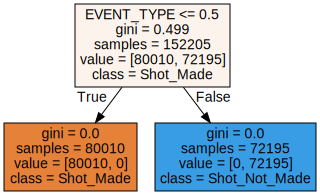

In [ ]:
from sklearn.tree import export_graphviz
from sklearn import metrics

import graphviz
full_tree = export_graphviz(model_1_decisiontree, out_file = None,
                           feature_names = list(pd.DataFrame(X3_train).columns),
                           class_names = ["Shot_Made", "Shot_Not_Made"],
                           filled = True)
graph = graphviz.Source(full_tree, format = 'png')
graph


           Feature  Importance
4       EVENT_TYPE         1.0
0   POSITION_GROUP         0.0
9         ZONE_ABB         0.0
15       MINS_LEFT         0.0
14         QUARTER         0.0
13   SHOT_DISTANCE         0.0
12           LOC_Y         0.0
11           LOC_X         0.0
10      ZONE_RANGE         0.0
8        ZONE_NAME         0.0
1         POSITION         0.0
7       BASIC_ZONE         0.0
6        SHOT_TYPE         0.0
5      ACTION_TYPE         0.0
3        AWAY_TEAM         0.0
2        HOME_TEAM         0.0
16       SECS_LEFT         0.0


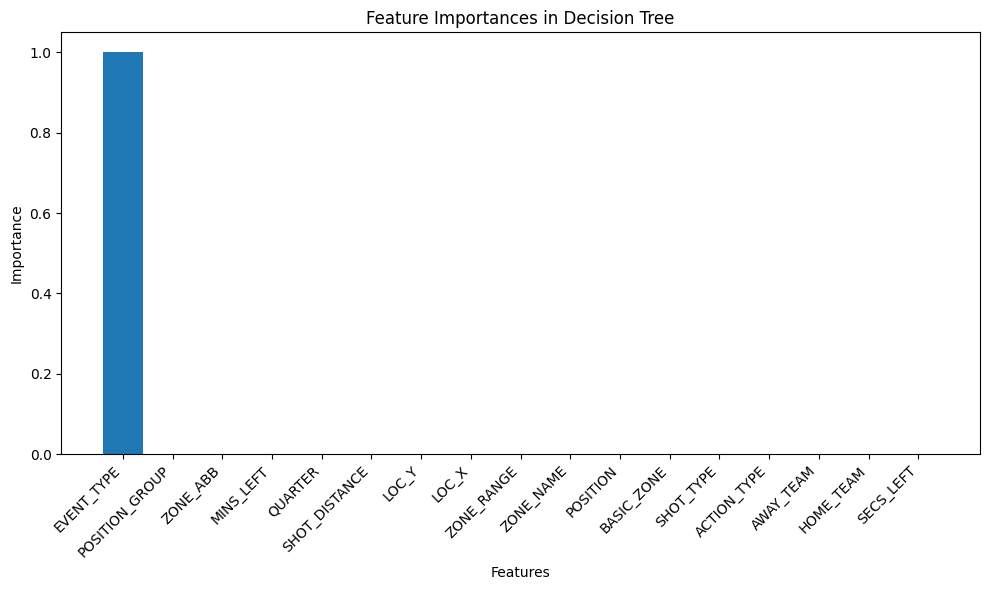

In [ ]:
#Feature importance
feature_importances_1 = model_1_decisiontree.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({
    'Feature': X3_train.columns,
    'Importance': feature_importances_1
}).sort_values(by='Importance', ascending=False)

# Display the feature importances
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances in Decision Tree')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#Not helpful. There is loss of context due to pd.factorize


In [ ]:
nba_df_3=pd.read_excel("NBA_2024_Shots.xlsx")
nba_df_3.head(5)

nba_df_3=nba_df_3.dropna(subset=['POSITION_GROUP','POSITION'])
New_number_of_records=len(nba_df_3)
print("New number of records:",New_number_of_records)


New number of records: 217437


In [ ]:
POSITION_GROUP_DUMMY_2=pd.get_dummies(nba_df_3['POSITION_GROUP'],drop_first=True).astype(int)
POSITION_DUMMY_2=pd.get_dummies(nba_df_3['POSITION'],drop_first=True).astype(int)
HOME_TEAM_DUMMY_2=pd.get_dummies(nba_df_3['HOME_TEAM'],drop_first=True).astype(int)
AWAY_TEAM_DUMMY_2=pd.get_dummies(nba_df_3['AWAY_TEAM'],drop_first=True).astype(int)
ACTION_TYPE_DUMMY_2=pd.get_dummies(nba_df_3['ACTION_TYPE'],drop_first=True).astype(int)
SHOT_TYPE_DUMMY_2=pd.get_dummies(nba_df_3['SHOT_TYPE'],drop_first=True).astype(int)
BASIC_ZONE_DUMMY_2=pd.get_dummies(nba_df_3['BASIC_ZONE'],drop_first=True).astype(int)
ZONE_NAME_DUMMY_2=pd.get_dummies(nba_df_3['ZONE_NAME'],drop_first=True).astype(int)
ZONE_ABB_DUMMY_2=pd.get_dummies(nba_df_3['ZONE_ABB'],drop_first=True).astype(int)
ZONE_RANGE_DUMMY_2=pd.get_dummies(nba_df_3['ZONE_RANGE'],drop_first=True).astype(int)
nba_df_3=pd.concat([nba_df_3,POSITION_GROUP_DUMMY_2,POSITION_DUMMY_2,HOME_TEAM_DUMMY_2,AWAY_TEAM_DUMMY_2,ACTION_TYPE_DUMMY_2,SHOT_TYPE_DUMMY_2,BASIC_ZONE_DUMMY_2,ZONE_NAME_DUMMY_2,ZONE_ABB_DUMMY_2,ZONE_RANGE_DUMMY_2],axis=1)
nba_df_3["SHOT_MADE"]=nba_df_3["SHOT_MADE"].astype(int)


In [ ]:
X4=nba_df_3.drop(['SHOT_MADE','SEASON_1','SEASON_2',"GAME_DATE","GAME_ID", "TEAM_NAME","TEAM_ID","PLAYER_ID","PLAYER_NAME","POSITION_GROUP","POSITION","HOME_TEAM","AWAY_TEAM","EVENT_TYPE","ACTION_TYPE","SHOT_TYPE","BASIC_ZONE","ZONE_NAME","ZONE_ABB","ZONE_RANGE"],axis=1)
y4=nba_df_3["SHOT_MADE"]
X4_train, X4_test, y4_train,y4_test=train_test_split(X4,y4, test_size=0.3, random_state=42)
model_2_decisiontree=DecisionTreeClassifier(max_depth=20,random_state=42)
model_2_decisiontree.fit(X4_train,y4_train)
accuracy_model_2_decisiontree=accuracy_score(y4_test,model_2_decisiontree.predict(X4_test))
print("Accuracy:",accuracy_model_2_decisiontree)
classification_report_2=classification_report(y4_test,model_2_decisiontree.predict(X4_test))
print(classification_report_2)
#The accuracy is 60 percent


Accuracy: 0.6022197694383125
              precision    recall  f1-score   support

           0       0.60      0.74      0.66     34237
           1       0.61      0.45      0.52     30995

    accuracy                           0.60     65232
   macro avg       0.60      0.59      0.59     65232
weighted avg       0.60      0.60      0.59     65232



                                Feature  Importance
2                         SHOT_DISTANCE    0.274025
5                             SECS_LEFT    0.088450
1                                 LOC_Y    0.086659
0                                 LOC_X    0.079752
4                             MINS_LEFT    0.044354
3                               QUARTER    0.023803
117                      Tip Layup Shot    0.019221
87                   Driving Layup Shot    0.007595
226                  Driving Layup Shot    0.006346
217                   Cutting Dunk Shot    0.005111
246                   Running Dunk Shot    0.004802
9                                    PF    0.004236
129                     Restricted Area    0.004076
153                                  SF    0.004021
7                                     G    0.003973
145                                   F    0.003882
156                                  SG    0.003837
12                                   PG    0.003734
27          

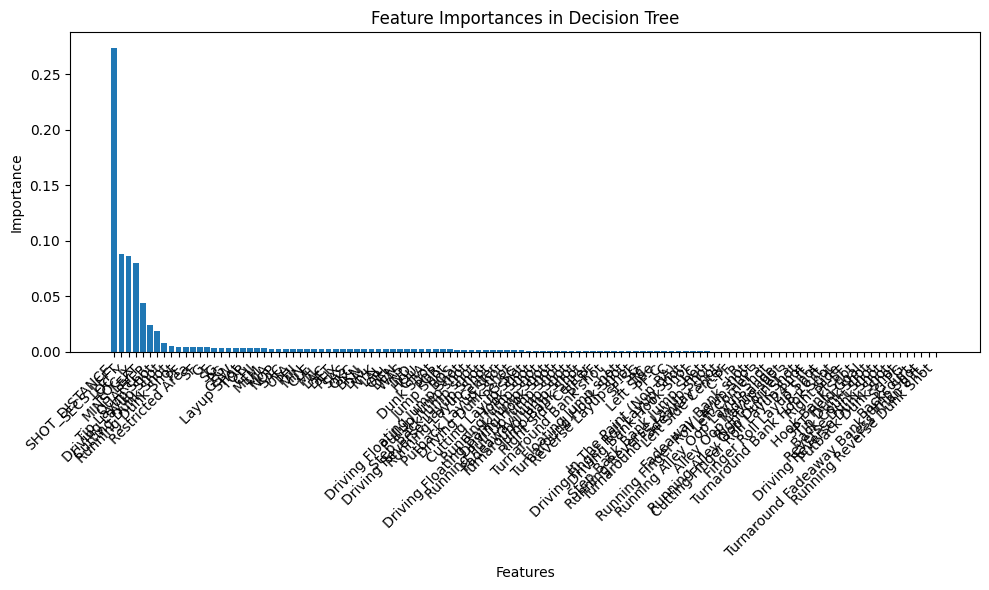

In [ ]:
#Feature importance
feature_importances_2 = model_2_decisiontree.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({
    'Feature': X4_train.columns,
    'Importance': feature_importances_2
}).sort_values(by='Importance', ascending=False)

# Display the feature importances
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances in Decision Tree')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#The problem of feature importance is not solved with one hot encoding

In [ ]:
nba_df_3_new=pd.read_excel("NBA_2024_Shots.xlsx")
nba_df_3_new.head(5)
nba_df_3_new=nba_df_3_new.dropna(subset=['POSITION_GROUP','POSITION'])
New_number_of_records=len(nba_df_3_new)
print("New number of records:",New_number_of_records)



New number of records: 217437


In [ ]:
X5=nba_df_3_new.drop(['SHOT_MADE','SEASON_1','SEASON_2',"GAME_DATE","TEAM_NAME","TEAM_ID","PLAYER_ID","PLAYER_NAME","EVENT_TYPE"],axis=1)
y5=nba_df_3_new["SHOT_MADE"]
# X5['HOME_GAME'] = X5['GAME_ID'].apply(lambda x: 1 if x % 2 == 0 else 0)
# print("HOME_GAME type",X5['HOME_GAME'].dtype)
categorical_columns_5=['POSITION_GROUP', 'POSITION', 'HOME_TEAM', 'AWAY_TEAM',  'ACTION_TYPE', 'SHOT_TYPE', 'BASIC_ZONE', 'ZONE_NAME', 'ZONE_ABB', 'ZONE_RANGE']

X5_train, X5_test, y5_train,y5_test=train_test_split(X5,y5, test_size=0.3, random_state=42)
# Function for target encoding
def target_encode5(train_data, train_target, test_data, categorical_columns_5):
    """
    Perform target encoding for categorical columns.

    Parameters:
    - train_data (pd.DataFrame): Training predictors.
    - train_target (pd.Series): Training target.
    - test_data (pd.DataFrame): Testing predictors.
    - categorical_columns (list): List of categorical columns to encode.

    Returns:
    - pd.DataFrame: Encoded training predictors.
    - pd.DataFrame: Encoded testing predictors.
    """
    train_encoded = train_data.copy()
    test_encoded = test_data.copy()

    for col in categorical_columns_5:
        # Compute mean target value for each category
        target_mean = train_target.groupby(train_data[col]).mean()

        # Map target means to the train and test data
        train_encoded[col] = train_data[col].map(target_mean)
        test_encoded[col] = test_data[col].map(target_mean)

        # Fill missing values in the test set with global mean
        test_encoded[col].fillna(train_target.mean(), inplace=True)

    return train_encoded, test_encoded

# Apply target encoding to the train and test datasets
X5_train_encoded, X5_test_encoded = target_encode5(X5_train, y5_train, X5_test, categorical_columns_5)

X5.head(5)

<ipython-input-36-ed4ab57973d3>:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_encoded[col].fillna(train_target.mean(), inplace=True)
<ipython-input-36-ed4ab57973d3>:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

,POSITION_GROUP,POSITION,GAME_ID,HOME_TEAM,AWAY_TEAM,ACTION_TYPE,SHOT_TYPE,BASIC_ZONE,ZONE_NAME,ZONE_ABB,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT
0,G,SG,22300003,MIA,WAS,Driving Floating Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center,C,8-16 ft.,-0.4,17.45,12,1,11,1
1,F,SF,22300003,MIA,WAS,Jump Shot,3PT Field Goal,Above the Break 3,Center,C,24+ ft.,1.5,30.55,25,1,10,26
2,G,PG,22300003,MIA,WAS,Driving Layup Shot,2PT Field Goal,Restricted Area,Center,C,Less Than 8 ft.,-3.3,6.55,3,1,9,46
3,G,SG,22300003,MIA,WAS,Running Finger Roll Layup Shot,2PT Field Goal,Restricted Area,Center,C,Less Than 8 ft.,-1.0,5.85,1,1,8,30
4,G,PG,22300003,MIA,WAS,Cutting Layup Shot,2PT Field Goal,Restricted Area,Center,C,Less Than 8 ft.,0.0,6.25,1,1,8,8


Accuracy: 0.6259811135638951
              precision    recall  f1-score   support

       False       0.60      0.84      0.70     34237
        True       0.69      0.39      0.50     30995

    accuracy                           0.63     65232
   macro avg       0.64      0.61      0.60     65232
weighted avg       0.64      0.63      0.61     65232



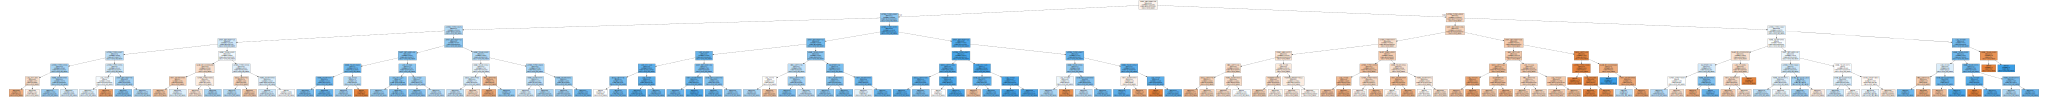

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_3_decisiontree=DecisionTreeClassifier(max_depth=7,random_state=42)
model_3_decisiontree.fit(X5_train_encoded,y5_train)
accuracy_score_model_3_decisiontree=accuracy_score(y5_test,model_3_decisiontree.predict(X5_test_encoded))
print("Accuracy:",accuracy_score_model_3_decisiontree)
classification_report_3=classification_report(y5_test,model_3_decisiontree.predict(X5_test_encoded))
print(classification_report_3)
#The accuracy is 62 percent.

from sklearn.tree import export_graphviz
from sklearn import metrics

import graphviz
full_tree = export_graphviz(model_3_decisiontree, out_file = None,
                           feature_names = list(pd.DataFrame(X5_train_encoded).columns),
                           class_names = ["Shot_Made", "Shot_Not_Made"],
                           filled = True)
graph = graphviz.Source(full_tree, format = 'png')
graph.render("decision_tree_graph_7")
graph



In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
grid_param = {
    'criterion':["gini", 'entropy'],
    "max_depth": range(2, 15, 1)
}

grid_search = GridSearchCV(estimator=model_3_decisiontree, param_grid = grid_param, cv = 5)
grid_search.fit(X5_train_encoded,y5_train)

grid_param_best = grid_search.best_params_
print(grid_param_best)



{'criterion': 'entropy', 'max_depth': 7}


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'criterion': 'entropy', 'max_depth': 7}


           Feature  Importance
13   SHOT_DISTANCE    0.669384
5      ACTION_TYPE    0.252940
3        HOME_TEAM    0.024208
12           LOC_Y    0.015847
15       MINS_LEFT    0.006538
16       SECS_LEFT    0.006392
11           LOC_X    0.006132
2          GAME_ID    0.004326
7       BASIC_ZONE    0.004264
9         ZONE_ABB    0.003112
4        AWAY_TEAM    0.002867
14         QUARTER    0.002460
1         POSITION    0.000931
0   POSITION_GROUP    0.000598
10      ZONE_RANGE    0.000000
6        SHOT_TYPE    0.000000
8        ZONE_NAME    0.000000


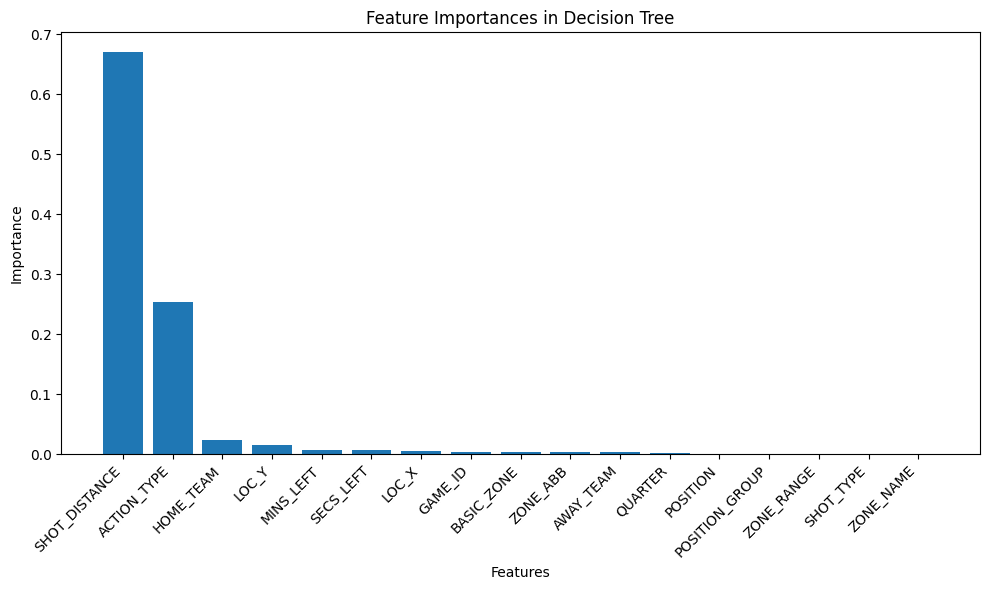

In [ ]:
#Feature importance
feature_importances_2 = model_3_decisiontree.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({
    'Feature': X5_train.columns,
    'Importance': feature_importances_2
}).sort_values(by='Importance', ascending=False)

# Display the feature importances
print(importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances in Decision Tree')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
POSITION_GROUP_DUMMY=pd.get_dummies(nba_df_3['POSITION_GROUP'],drop_first=True).astype(int)
POSITION_DUMMY=pd.get_dummies(nba_df_3['POSITION'],drop_first=True).astype(int)
HOME_TEAM_DUMMY=pd.get_dummies(nba_df_3['HOME_TEAM'],drop_first=True).astype(int)
AWAY_TEAM_DUMMY=pd.get_dummies(nba_df_3['AWAY_TEAM'],drop_first=True).astype(int)
EVENT_TYPE_DUMMY=pd.get_dummies(nba_df_3['EVENT_TYPE'],drop_first=True).astype(int)
ACTION_TYPE_DUMMY=pd.get_dummies(nba_df_3['ACTION_TYPE'],drop_first=True).astype(int)
SHOT_TYPE_DUMMY=pd.get_dummies(nba_df_3['SHOT_TYPE'],drop_first=True).astype(int)
BASIC_ZONE_DUMMY=pd.get_dummies(nba_df_3['BASIC_ZONE'],drop_first=True).astype(int)
ZONE_NAME_DUMMY=pd.get_dummies(nba_df_3['ZONE_NAME'],drop_first=True).astype(int)
ZONE_ABB_DUMMY=pd.get_dummies(nba_df_3['ZONE_ABB'],drop_first=True).astype(int)
ZONE_RANGE_DUMMY=pd.get_dummies(nba_df_3['ZONE_RANGE'],drop_first=True).astype(int)
nba_df_3=pd.concat([nba_df_3,POSITION_GROUP_DUMMY,POSITION_DUMMY,HOME_TEAM_DUMMY,AWAY_TEAM_DUMMY,EVENT_TYPE_DUMMY,ACTION_TYPE_DUMMY,SHOT_TYPE_DUMMY,BASIC_ZONE_DUMMY,ZONE_NAME_DUMMY,ZONE_ABB_DUMMY,ZONE_RANGE_DUMMY],axis=1)
nba_df_3["SHOT_MADE"]=nba_df_3["SHOT_MADE"].astype(int)
X4=nba_df_3.drop(['SHOT_MADE','SEASON_1','SEASON_2',"GAME_DATE","GAME_ID", "TEAM_NAME","TEAM_ID","PLAYER_ID","PLAYER_NAME","POSITION_GROUP","POSITION","EVENT_TYPE","ACTION_TYPE","SHOT_TYPE","BASIC_ZONE","ZONE_NAME","ZONE_ABB","ZONE_RANGE"],axis=1)
y4=nba_df_3["SHOT_MADE"]
print(X4.head(5))


  HOME_TEAM AWAY_TEAM  LOC_X  LOC_Y  SHOT_DISTANCE  QUARTER  MINS_LEFT  \
0       MIA       WAS   -0.4  17.45             12        1         11   
1       MIA       WAS    1.5  30.55             25        1         10   
2       MIA       WAS   -3.3   6.55              3        1          9   
3       MIA       WAS   -1.0   5.85              1        1          8   
4       MIA       WAS    0.0   6.25              1        1          8   

   SECS_LEFT  F  G  ...  Right Side Center  C  L  LC  R  RC  24+ ft.  \
0          1  0  1  ...                  0  1  0   0  0   0        0   
1         26  1  0  ...                  0  1  0   0  0   0        1   
2         46  0  1  ...                  0  1  0   0  0   0        0   
3         30  0  1  ...                  0  1  0   0  0   0        0   
4          8  0  1  ...                  0  1  0   0  0   0        0   

   8-16 ft.  Back Court Shot  Less Than 8 ft.  
0         1                0                0  
1         0               

In [ ]:
X4_train, X4_test, y4_train,y4_test=train_test_split(X4,y4, test_size=0.3, random_state=42)

model_3_decisiontree=DecisionTreeClassifier(criterion="entropy",random_state=42)
model_3_decisiontree.fit(X2_train,y2_train)
accuracy_model_3_decisiontree=accuracy_score(y2_test,model_3_decisiontree.predict(X2_test))
print("Accuracy:",accuracy_model_3_decisiontree)
classification_report_3=classification_report(y2_test,model_3_decisiontree.predict(X2_test))
print(classification_report_3)




